In [3]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display
 
%matplotlib inline

In [11]:
data= pd.read_csv("Titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
data_=data[["Sex","Age","Survived","Fare"]]
data_

,Sex,Age,Survived,Fare
0,male,22.0,0,7.2500
1,female,38.0,1,71.2833
2,female,26.0,1,7.9250
3,female,35.0,1,53.1000
4,male,35.0,0,8.0500
...,...,...,...,...
886,male,27.0,0,13.0000
887,female,19.0,1,30.0000
888,female,NaN,0,23.4500
889,male,26.0,1,30.0000


In [21]:
data_["Age"].isnull()
#移除遺失值（留下非遺失值）
data1=data_[data_['Age'].notnull()]
data2=data1[data1['Sex'].notnull()]
data3=data2[data2['Survived'].notnull()]
data4=data3[data3['Fare'].notnull()]
data4

,Sex,Age,Survived,Fare
0,male,22.0,0,7.2500
1,female,38.0,1,71.2833
2,female,26.0,1,7.9250
3,female,35.0,1,53.1000
4,male,35.0,0,8.0500
...,...,...,...,...
885,female,39.0,0,29.1250
886,male,27.0,0,13.0000
887,female,19.0,1,30.0000
889,male,26.0,1,30.0000


In [53]:
df_a = data_.dropna()
df_a

,Sex,Age,Survived,Fare
0,male,22.0,0,7.2500
1,female,38.0,1,71.2833
2,female,26.0,1,7.9250
3,female,35.0,1,53.1000
4,male,35.0,0,8.0500
...,...,...,...,...
885,female,39.0,0,29.1250
886,male,27.0,0,13.0000
887,female,19.0,1,30.0000
889,male,26.0,1,30.0000


In [25]:
!pip install pingouin
import pingouin as pg

  Created wheel for pingouin: filename=pingouin-0.3.10-py3-none-any.whl size=203403 sha256=67b0f12bdccd330ba73b06ccb998cb0d349369f79edbd056d34ad8c3f5728fed
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\26\7e\4b\d7815d18674094caa0d58cc40bb6a595b4a2e67ada30e2d42d
  Created wheel for outdated: filename=outdated-0.2.0-py3-none-any.whl size=4964 sha256=a1633fcd7412b46339ac9a67aeea24c272fa205b4ddb77c831e72d213db6ff8e
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\2d\4f\c9\062da6e68841f60d0c3434980775671daaa07a574110567de6
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7054 sha256=e62434d34e773ccac735d0a2213b7d83c07025d022ef7efda1ae95c61cfa08f5
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\6a\33\c4\0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin outdated littleutils


In [54]:
df_a['Survived_cate']=df_a['Survived']
df_a['Survived_cate']=df_a['Survived_cate'].astype('object')
print(df_a.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            714 non-null    object 
 1   Age            714 non-null    float64
 2   Survived       714 non-null    int64  
 3   Fare           714 non-null    float64
 4   Survived_cate  714 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.5+ KB
None


<ipython-input-54-ee874a83fe78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['Survived_cate']=df_a['Survived']
<ipython-input-54-ee874a83fe78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['Survived_cate']=df_a['Survived_cate'].astype('object')


In [55]:
#Q1: 透過數值法計算 Age 和 Survived 是否有相關性?
aov = pg.anova(dv='Age', between='Survived_cate', data=df_a, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Survived_cate,897.187582,1,897.187582,4.271195,0.039125,0.005963
1,Within,149559.448362,712,210.055405,NaN,NaN,NaN


In [56]:
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
etaSq

0.0059630974469252

In [57]:
def judgment_etaSq(etaSq):
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
    return(qual)
judgment_etaSq(etaSq)

'Negligible'

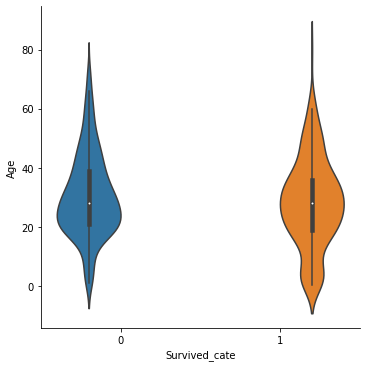

In [58]:
g = sns.catplot(x="Survived_cate", y="Age", hue="Survived_cate",
               data=df_a, kind="violin")

In [48]:
!pip install researchpy
import researchpy   
%matplotlib inline

In [59]:
#Q2:透過數值法計算 Sex 和 Survived 是否有相關性?
contTable = pd.crosstab(df_a['Sex'], df_a['Survived_cate'])
contTable

Survived_cate,0,1
Sex,,
female,64,197
male,360,93


In [65]:
df = min(contTable.shape[0], contTable.shape[1]) - 1
df

1

In [61]:
crosstab, res = researchpy.crosstab(df_a['Survived_cate'], df_a['Sex'], test='chi-square')
#print(res)
print("Cramer's value is",res.loc[2,'results'])

Cramer's value is 0.5388


In [66]:
def judgment_CramerV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)

judgment_CramerV(df,res.loc[2,'results'])

'large'

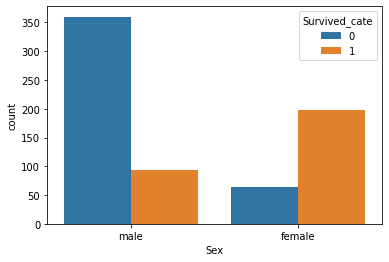

In [68]:
g= sns.countplot(x="Sex", hue="Survived_cate", data=df_a) #

In [70]:
#Q3: 透過數值法計算 Age 和 Fare 是否有相關性?
corr, _=stats.pearsonr(df_a['Age'], df_a['Fare'])
print(corr)

0.09606669176903906


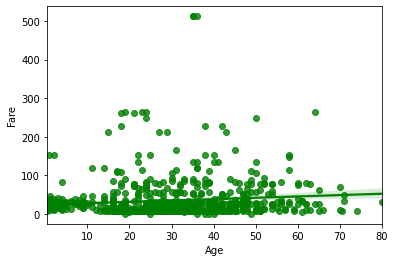

In [72]:
g = sns.regplot(x="Age", y="Fare", color="g",data=df_a)  #有關係(年齡與票價)